In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report # For model evaluation metrics
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.model_selection import learning_curve 
import joblib # For saving the model into a file
import seaborn as sns # For visulaizing different factors
import warnings # For removing unnecessary warnings
import matplotlib.pyplot as plt # For general-purpose plotting

In [2]:
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\collegiate_athlete_injury_dataset.csv'
df = pd.read_csv(file_path)

# Removing extra white space from the columns in the dataset
df.columns = df.columns.str.strip()

In [3]:
# Describe the first 5 rows of the dataset
df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [6]:
df.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.170000,180.805000,77.475000,5.10500,11.315000,1.985000,2.385000,1.975000,4.920000,74.465000,72.630000,93.395000,46.470000,0.070000
std,2.002787,11.529598,12.440789,2.49904,4.438952,0.811212,1.154748,0.817137,2.560543,14.636939,14.432762,8.660485,18.943956,0.255787
min,18.000000,160.000000,55.000000,1.00000,5.000000,1.000000,1.000000,1.000000,1.000000,50.000000,50.000000,62.000000,2.000000,0.000000
25%,19.000000,171.000000,67.000000,3.00000,7.000000,1.000000,1.000000,1.000000,3.000000,62.000000,60.750000,89.000000,33.000000,0.000000
50%,21.000000,182.500000,77.500000,5.00000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,45.000000,0.000000
75%,23.000000,191.000000,89.000000,7.00000,15.000000,3.000000,3.000000,3.000000,7.000000,86.250000,85.000000,100.000000,60.000000,0.000000
max,24.000000,199.000000,99.000000,9.00000,19.000000,3.000000,4.000000,3.000000,9.000000,99.000000,99.000000,100.000000,100.000000,1.000000


In [7]:
df.dtypes

Athlete_ID                  object
Age                          int64
Gender                      object
Height_cm                    int64
Weight_kg                    int64
Position                    object
Training_Intensity           int64
Training_Hours_Per_Week      int64
Recovery_Days_Per_Week       int64
Match_Count_Per_Week         int64
Rest_Between_Events_Days     int64
Fatigue_Score                int64
Performance_Score            int64
Team_Contribution_Score      int64
Load_Balance_Score           int64
ACL_Risk_Score               int64
Injury_Indicator             int64
dtype: object

In [8]:
df.columns

Index(['Athlete_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'Position',
       'Training_Intensity', 'Training_Hours_Per_Week',
       'Recovery_Days_Per_Week', 'Match_Count_Per_Week',
       'Rest_Between_Events_Days', 'Fatigue_Score', 'Performance_Score',
       'Team_Contribution_Score', 'Load_Balance_Score', 'ACL_Risk_Score',
       'Injury_Indicator'],
      dtype='object')

In [9]:
df.nunique()

Athlete_ID                  200
Age                           7
Gender                        2
Height_cm                    39
Weight_kg                    45
Position                      3
Training_Intensity            9
Training_Hours_Per_Week      15
Recovery_Days_Per_Week        3
Match_Count_Per_Week          4
Rest_Between_Events_Days      3
Fatigue_Score                 9
Performance_Score            49
Team_Contribution_Score      49
Load_Balance_Score           31
ACL_Risk_Score               73
Injury_Indicator              2
dtype: int64

In [10]:
# Counting the number of duplicated values
duplicated_values = df.duplicated().mean()
duplicated_values

0.0

In [11]:
# Counting missing values
missing_values = df.isna().mean() * 100
missing_values

Athlete_ID                  0.0
Age                         0.0
Gender                      0.0
Height_cm                   0.0
Weight_kg                   0.0
Position                    0.0
Training_Intensity          0.0
Training_Hours_Per_Week     0.0
Recovery_Days_Per_Week      0.0
Match_Count_Per_Week        0.0
Rest_Between_Events_Days    0.0
Fatigue_Score               0.0
Performance_Score           0.0
Team_Contribution_Score     0.0
Load_Balance_Score          0.0
ACL_Risk_Score              0.0
Injury_Indicator            0.0
dtype: float64

In [12]:
# Finding the distribution of Ages
age_distribution = df['Age'].value_counts(normalize=True)
print("Proportion of Ages:")
print(age_distribution)

Proportion of Ages:
Age
24    0.185
21    0.170
22    0.145
19    0.135
20    0.130
18    0.120
23    0.115
Name: proportion, dtype: float64


In [13]:
# Finding the distribution of Ages
gender_distribution = df['Gender'].value_counts(normalize=True)
print("Proportion of Genders:")
print(gender_distribution)

Proportion of Genders:
Gender
Female    0.535
Male      0.465
Name: proportion, dtype: float64


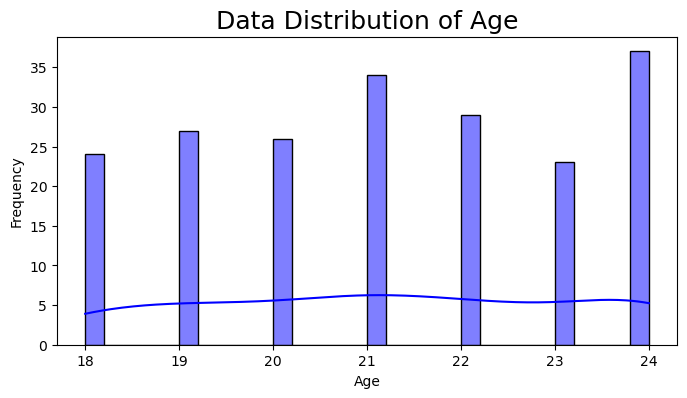

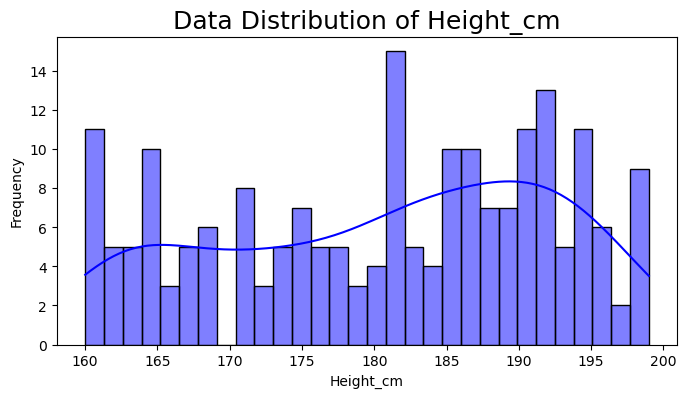

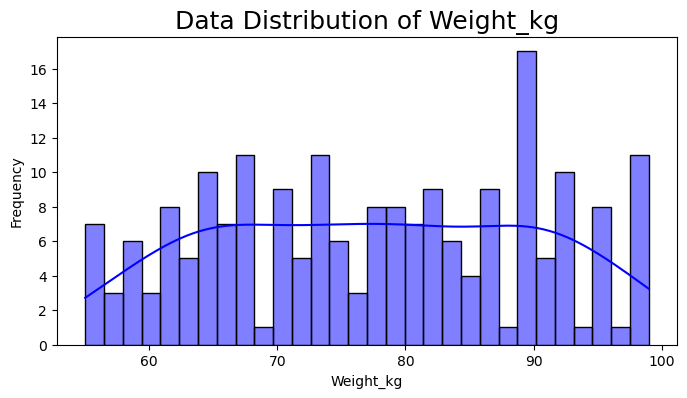

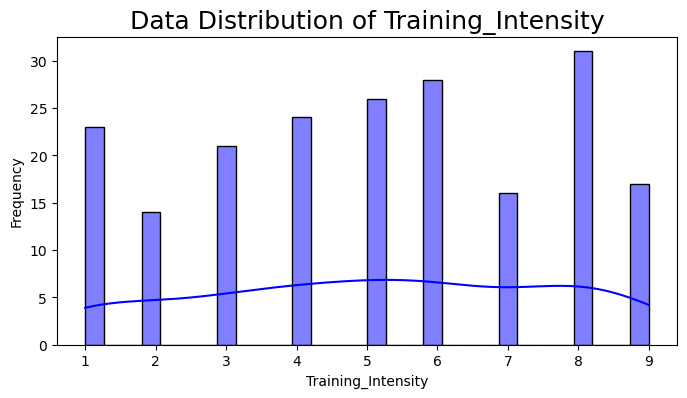

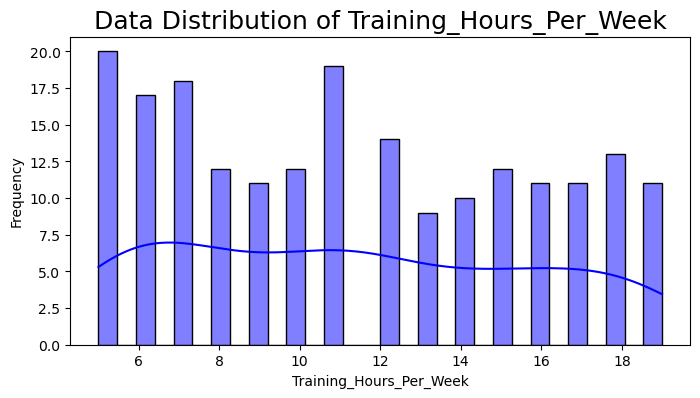

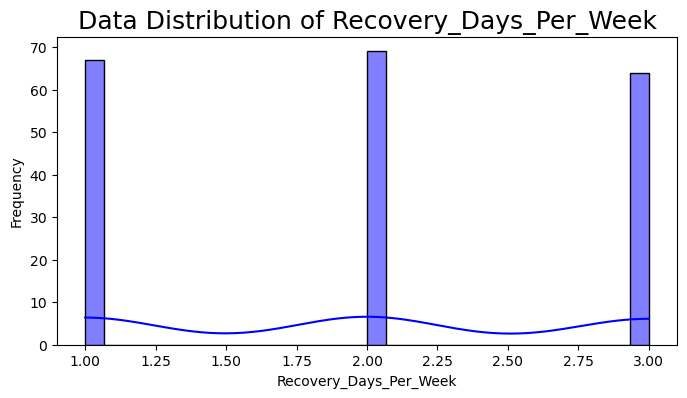

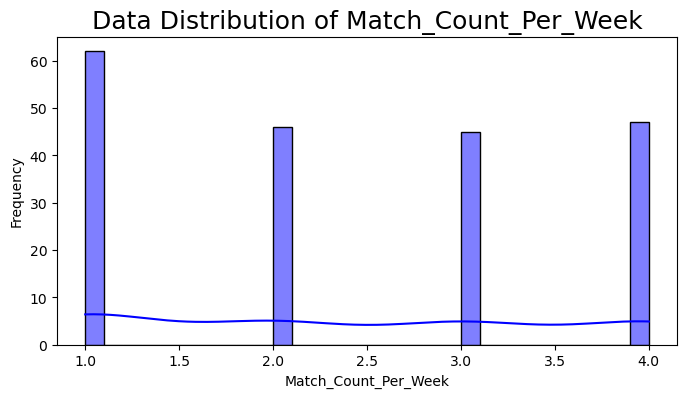

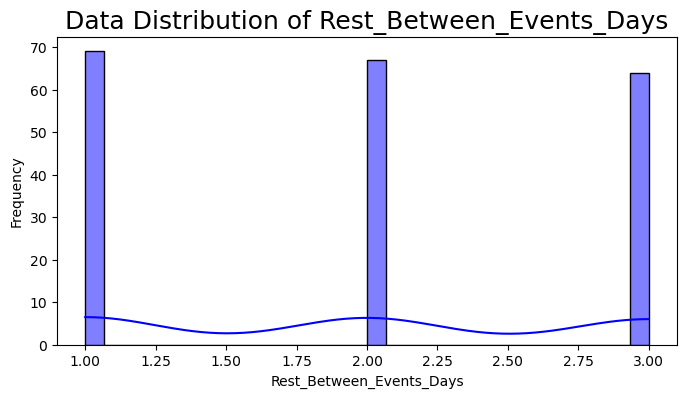

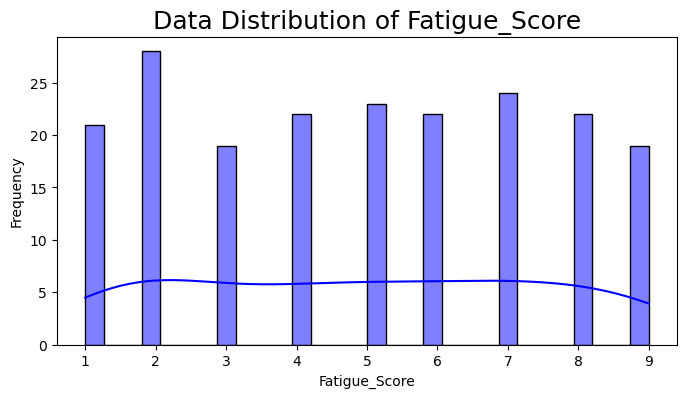

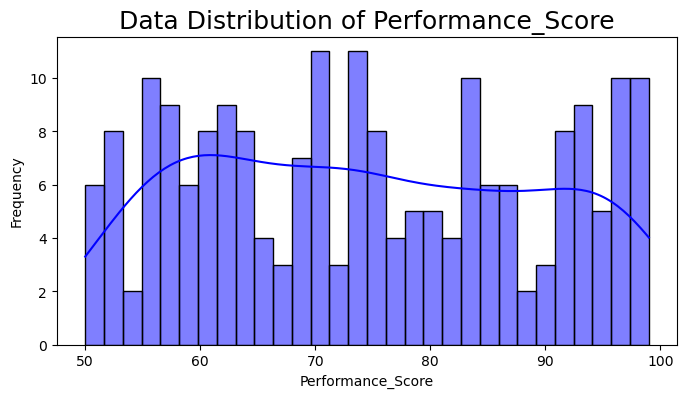

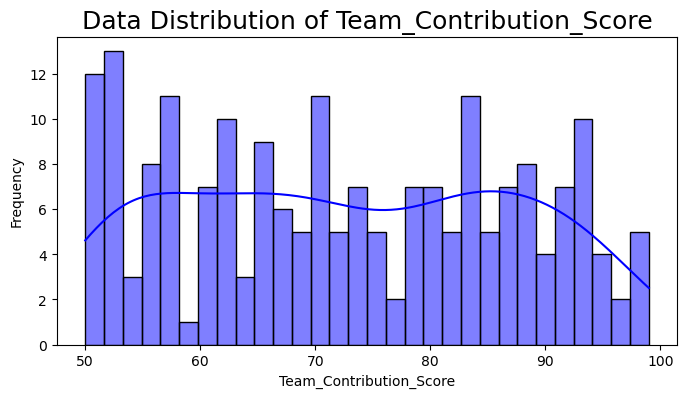

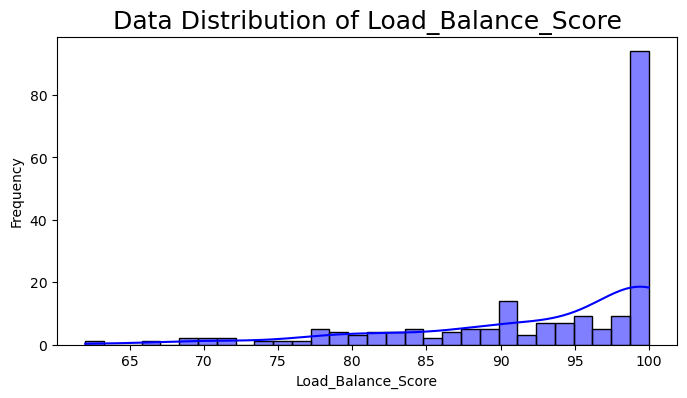

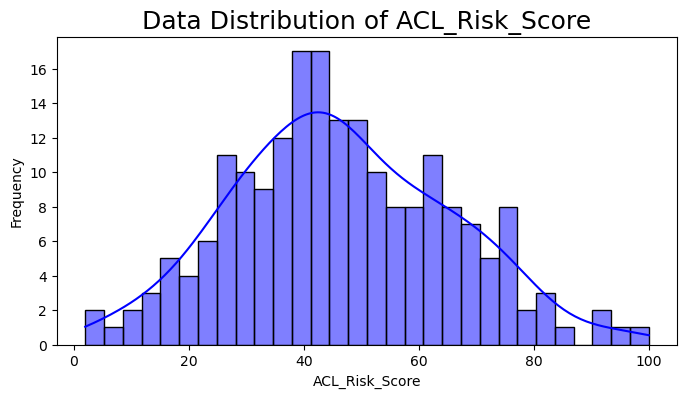

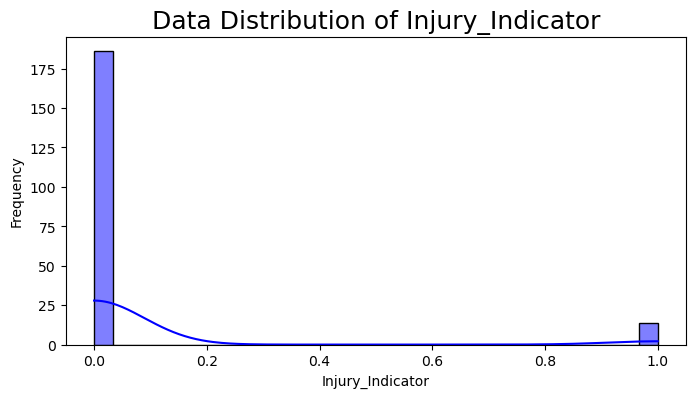

In [14]:
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Data Distribution of {col}", fontsize=18)
    plt.ylabel("Frequency")
    plt.xlabel(col)
    plt.show()

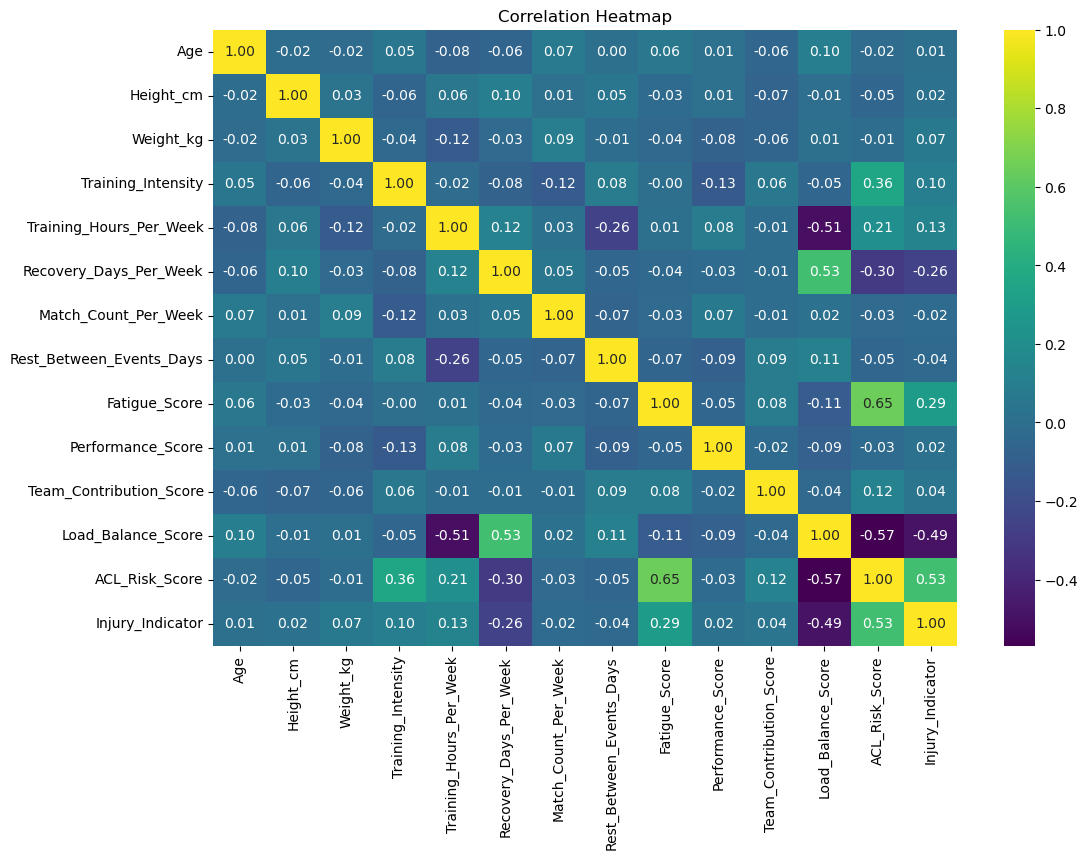

In [15]:
# Selecting only numerical values in the variable
numeric_df = df.select_dtypes(include=[np.number])

# Plotting and Showing the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

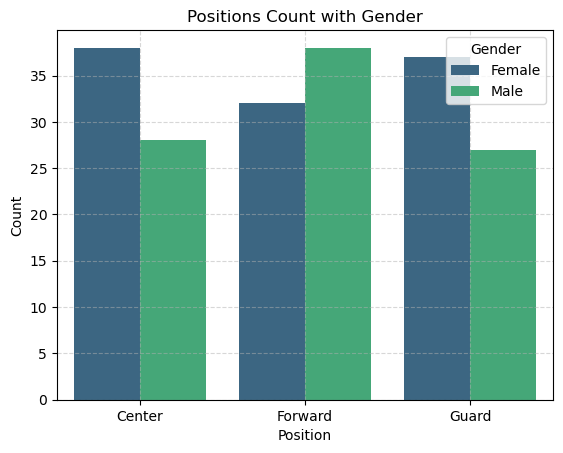

In [16]:
sns.countplot(x="Position",data=df, hue="Gender", palette="viridis")
plt.title("Positions Count with Gender")
plt.xlabel("Position")
plt.grid(alpha=0.5, linestyle='--')
plt.ylabel("Count")
plt.show()

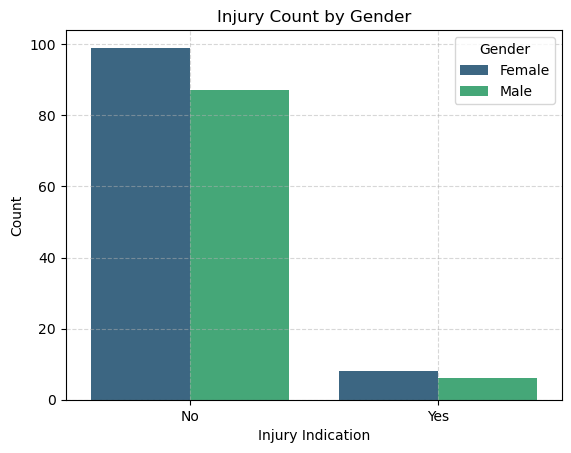

In [17]:
sns.countplot(x="Injury_Indicator",data=df, hue="Gender", palette="viridis")
plt.title("Injury Count by Gender")
plt.xlabel("Injury Indication")
plt.grid(alpha=0.5, linestyle='--')
plt.xticks([0, 1], ["No", "Yes"])
plt.ylabel("Count")
plt.show()

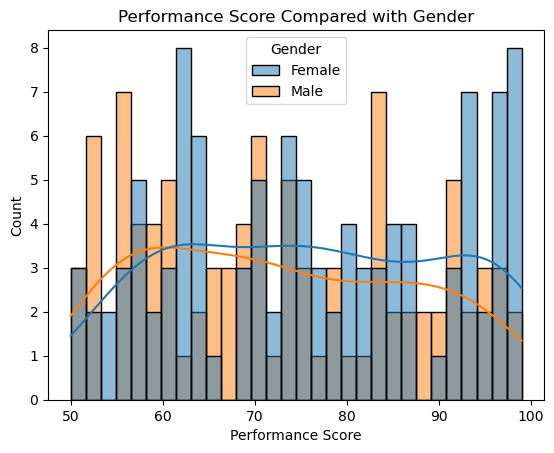

In [18]:
sns.histplot(data=df, x="Performance_Score", hue="Gender", kde=True, bins=30)
plt.title("Performance Score Compared with Gender")
plt.xlabel("Performance Score")
plt.ylabel("Count")
plt.show()

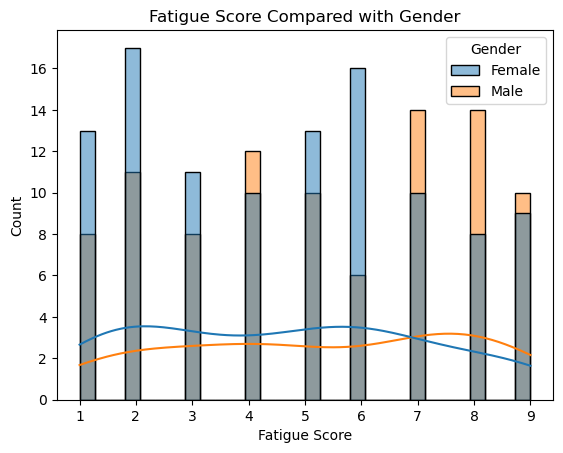

In [19]:
sns.histplot(data=df, x="Fatigue_Score", hue="Gender", kde=True, bins=30)
plt.title("Fatigue Score Compared with Gender")
plt.xlabel("Fatigue Score")
plt.ylabel("Count")
plt.show()

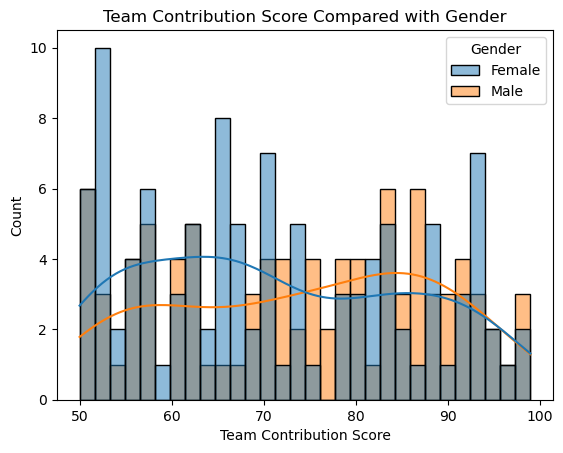

In [20]:
sns.histplot(data=df, x="Team_Contribution_Score", hue="Gender", kde=True, bins=30)
plt.title("Team Contribution Score Compared with Gender")
plt.xlabel("Team Contribution Score")
plt.ylabel("Count")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_2100\230288583.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Training_Hours_Per_Week", y="Performance_Score", data=df, ci=None, palette="viridis")
C:\Users\dell\AppData\Local\Temp\ipykernel_2100\230288583.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Training_Hours_Per_Week", y="Performance_Score", data=df, ci=None, palette="viridis")


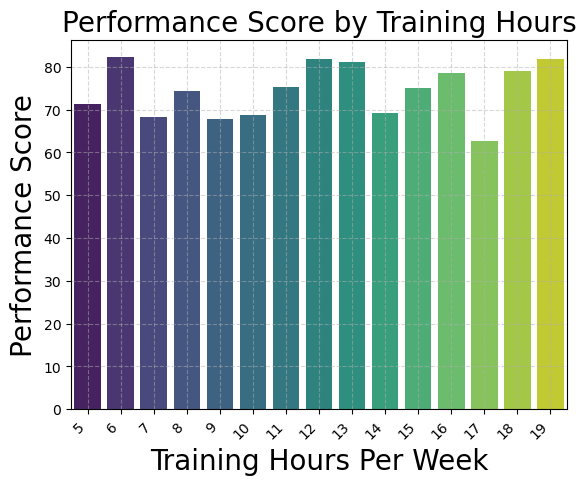

In [21]:
sns.barplot(x="Training_Hours_Per_Week", y="Performance_Score", data=df, ci=None, palette="viridis")
plt.title("Performance Score by Training Hours", fontsize=20)
plt.xlabel("Training Hours Per Week", fontsize=20)
plt.ylabel("Performance Score", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_2100\3237763959.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Training_Hours_Per_Week", y="Fatigue_Score", data=df, ci=None, palette="viridis")
C:\Users\dell\AppData\Local\Temp\ipykernel_2100\3237763959.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Training_Hours_Per_Week", y="Fatigue_Score", data=df, ci=None, palette="viridis")


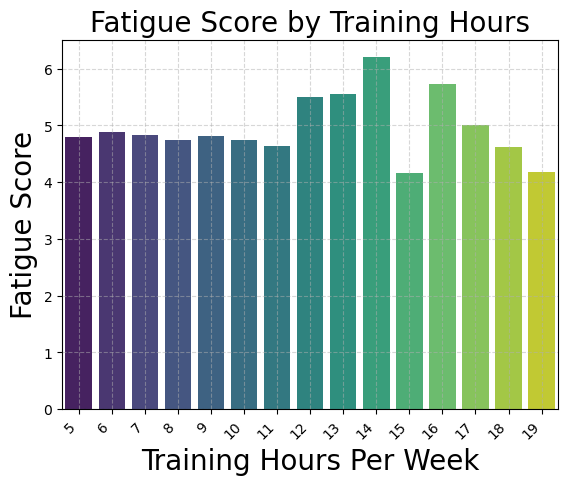

In [22]:
sns.barplot(x="Training_Hours_Per_Week", y="Fatigue_Score", data=df, ci=None, palette="viridis")
plt.title("Fatigue Score by Training Hours", fontsize=20)
plt.xlabel("Training Hours Per Week", fontsize=20)
plt.ylabel("Fatigue Score", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_2100\2649097342.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Training_Hours_Per_Week", y="Team_Contribution_Score", data=df, ci=None, palette="viridis")
C:\Users\dell\AppData\Local\Temp\ipykernel_2100\2649097342.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Training_Hours_Per_Week", y="Team_Contribution_Score", data=df, ci=None, palette="viridis")


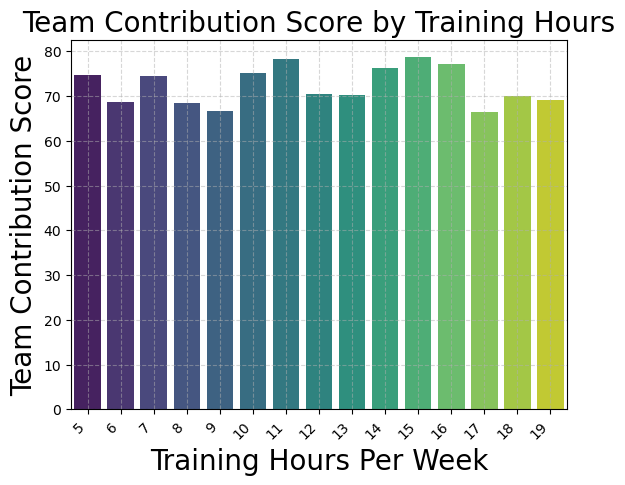

In [23]:
sns.barplot(x="Training_Hours_Per_Week", y="Team_Contribution_Score", data=df, ci=None, palette="viridis")
plt.title("Team Contribution Score by Training Hours", fontsize=20)
plt.xlabel("Training Hours Per Week", fontsize=20)
plt.ylabel("Team Contribution Score", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_2100\2852996261.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Position", y="Performance_Score", hue="Gender", data=df, ci=None, palette="viridis")


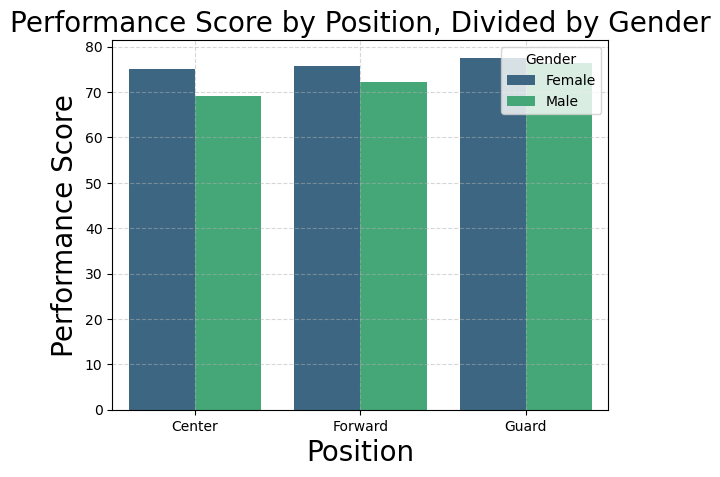

In [24]:
sns.barplot(x="Position", y="Performance_Score", hue="Gender", data=df, ci=None, palette="viridis")
plt.title("Performance Score by Position, Divided by Gender", fontsize=20)
plt.xlabel("Position", fontsize=20)
plt.ylabel("Performance Score", fontsize=20)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_2100\2427481414.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y="Performance_Score", x="Fatigue_Score", data=df, ci=None, palette="viridis")
C:\Users\dell\AppData\Local\Temp\ipykernel_2100\2427481414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Performance_Score", x="Fatigue_Score", data=df, ci=None, palette="viridis")


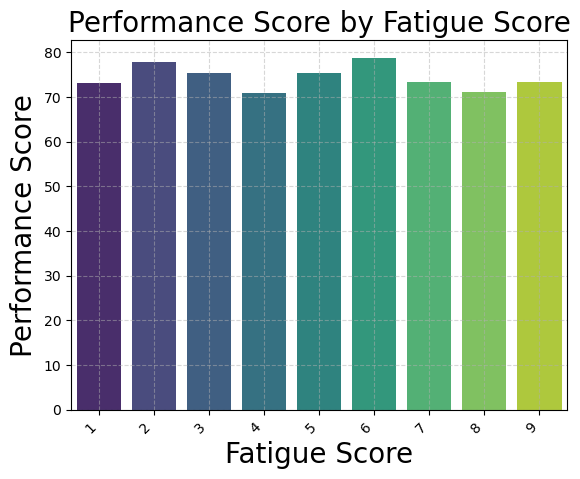

In [25]:
sns.barplot(y="Performance_Score", x="Fatigue_Score", data=df, ci=None, palette="viridis")
plt.title("Performance Score by Fatigue Score", fontsize=20)
plt.xlabel("Fatigue Score", fontsize=20)
plt.ylabel("Performance Score", fontsize=20)
plt.grid(alpha=0.5, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
# Preprocessing categorical Values
Gender_map = {"Male": 0, "Female": 1}
Position_map = {"Guard": 0, "Center": 1, "Forward": 2}

df["Gender"] = df["Gender"].map(Gender_map)
df["Position"] = df["Position"].map(Position_map)

In [27]:
from sklearn.preprocessing import StandardScaler  # For feature scaling and standardization
from sklearn.metrics import accuracy_score

# Setting up our features and target
features = ["Age", "Gender", "Position", "Height_cm", "Weight_kg", "Training_Intensity", "Training_Hours_Per_Week",
           "Recovery_Days_Per_Week", "Match_Count_Per_Week", "Fatigue_Score", "Performance_Score",
           "Team_Contribution_Score", "Load_Balance_Score"]

X = df[features]
Y = df["Injury_Indicator"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Apply scaling

In [28]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Set up the model and train it
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Since R2 is not ideal for classification, calculate R2 for probabilities:
prob_predictions = model.predict_proba(X_test)[:, 1]  # Probabilities for class

# Settign up Metrics
mse = mean_squared_error(y_test, prob_predictions)
mae = mean_absolute_error(y_test, prob_predictions)

# Outputting Metrics
print(classification_report(y_test, predictions))
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       0.00      0.00      0.00         2

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40

Mean Squared Error: 0.05
Mean Absolute Error: 0.08


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


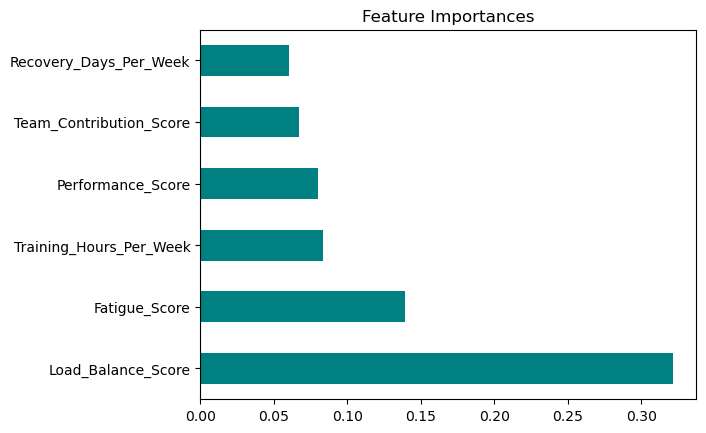

In [30]:
# Visualizing the importance of the top 6 largest columns
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(6).plot(kind="barh", color="teal")
plt.title("Feature Importances")
plt.show()

In [31]:
# Save the model to a file
with open('athlete_injury_model.pkl', 'wb') as model_file:
    joblib.dump(model, model_file)